In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
exp_name = 'exp_1'

In [ ]:
df1 = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
df1

In [15]:
df2 = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
df2

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.587160e+09,10,0,0,-148.378734,224,616,83,757,0.583929
1,1.587160e+09,20,0,0,-85.797069,273,567,110,730,0.597024
2,1.587161e+09,30,0,0,-42.525756,424,416,190,650,0.639286
3,1.587161e+09,40,0,0,-37.510682,413,427,168,672,0.645833
4,1.587162e+09,100,0,0,-16.416497,837,3,275,565,0.834524


In [4]:
df3 = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
df3

FileNotFoundError: [Errno 2] File b'results/exp_1/control_test_results.csv' does not exist: b'results/exp_1/control_test_results.csv'

In [6]:
df23 = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
df23

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.587160e+09,10,0,0,-148.378734,327,873,133,1067,0.580833
1,1.587160e+09,20,0,0,-85.797069,401,799,162,1038,0.599583
2,1.587161e+09,30,0,0,-42.525756,616,584,272,928,0.643333
3,1.587161e+09,40,0,0,-37.510682,577,623,241,959,0.640000
4,1.587162e+09,100,0,0,-16.416497,1195,5,350,850,0.852083


In [5]:
df4 = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
df_acc = df4[['eps', 'acc']]
df_acc

,eps,acc
0,10,0.580833
1,20,0.599583
2,30,0.643333
3,40,0.640000
4,100,0.852083


In [38]:
df5 = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
df_hamming = df5[df5['metric'] == 'hamming']
df_hamming_metric = df_hamming[['eps', 'mean_all']]
df_hamming_metric

,eps,mean_all
0,10,0.699467
3,20,0.453122
6,30,0.331269
9,40,0.269589
12,100,0.112609


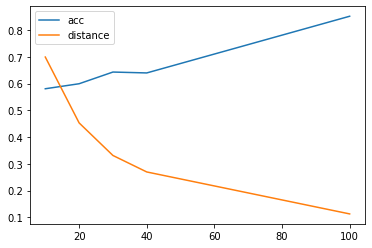

In [42]:
plt.plot(df_acc['eps'], df_acc['acc'])
plt.plot(df_hamming_metric['eps'], df_hamming_metric['mean_all'])
plt.legend(['acc', 'distance'])
plt.show()

In [43]:
df6 = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
df_metric = df6[df6['metric'] == 'cosine']
df_metric_c = df_metric[['eps', 'mean_all']]
df_metric_c

,eps,mean_all
2,10,0.149068
5,20,0.061460
8,30,0.044070
11,40,0.037209
14,100,0.017350


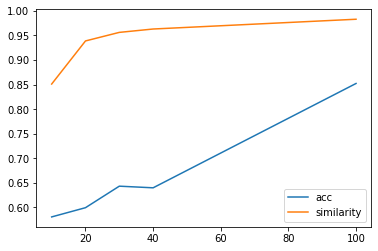

In [44]:
plt.plot(df_acc['eps'], df_acc['acc'])
plt.plot(df_metric_c['eps'], 1 - df_metric_c['mean_all'])
plt.legend(['acc', 'similarity'])
plt.show()

In [7]:
from keras.models import load_model 

In [9]:
model = load_model('results/exp_1/deeplog_dp_gen_emb.h5')

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 4)             116       
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1189      
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
embedding = model.layers[0].get_weights()[0]

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
anomal = [6, 7, 9, 11, 12, 13, 14, 18, 23, 26, 28]

a 13 a 
a 22 a
b 13 b
b 22 b

In [26]:
for i in anomal:
    for j in range(0, 29):
        print(i, j, cosine_similarity(embedding[i].reshape(1, -1), embedding[j].reshape(1, -1))[0][0], j in anomal)

6 0 0.26388812 False
6 1 -0.15393472 False
6 2 0.5071637 False
6 3 0.2916785 False
6 4 0.49635866 False
6 5 -0.5332525 False
6 6 1.0 True
6 7 -0.23415348 True
6 8 0.23150283 False
6 9 0.53997374 True
6 10 0.011769496 False
6 11 0.14664817 True
6 12 -0.5076693 True
6 13 -0.062258214 True
6 14 -0.4437006 True
6 15 -0.5963671 False
6 16 0.20626374 False
6 17 0.30252993 False
6 18 0.22264275 True
6 19 -0.55869514 False
6 20 -0.90385914 False
6 21 -0.30932415 False
6 22 0.41004935 False
6 23 0.021860689 True
6 24 0.4929083 False
6 25 -0.9618191 False
6 26 -0.8271656 True
6 27 -0.59472716 False
6 28 -0.886323 True
7 0 0.7747382 False
7 1 0.11835551 False
7 2 0.0694437 False
7 3 0.12531567 False
7 4 -0.8738258 False
7 5 -0.3194123 False
7 6 -0.23415348 True
7 7 1.0000001 True
7 8 -0.4341766 False
7 9 0.45068341 True
7 10 -0.50588113 False
7 11 -0.4588503 True
7 12 -0.61634314 True
7 13 0.6619732 True
7 14 0.2701052 True
7 15 -0.29900083 False
7 16 0.54768354 False
7 17 -0.77731586 False
7 18 